# LoRa Transmission Data Analysis

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame, Series
from pandas.io.json import json_normalize
from influxdb import InfluxDBClient
from datetime import datetime, timedelta, timezone
from geopy.distance import geodesic
from tabulate import tabulate
import GPy
import numpy as np
from IPython.display import display
import seaborn as sns; sns.set()

In [2]:
df = pd.read_csv (r'C:\Users\nahsh\desktop\ISTpaper\data\ol-pejeta-data.csv')

In [3]:
# make time a datetime object
df[['time']] = df[['time']].apply(pd.to_datetime)

In [27]:
# Compute distances from points to gateways

kerlink_loc = (0.026884535, 36.903187)
lorix_loc = (0.026812032, 36.9032)

mdot_01_p1_loc = (0.025448333, 36.903027)
mdot_02_p1_loc = (0.022585, 36.905968)

mdot_01_p2_loc = (0.0302132, 36.90529)
mdot_02_p2_loc = (-0.0042156363, 36.963684)
mdot_03_p2_loc = (0.026764926, 36.914623)

sensors = ['mdot-01-P1','mdot-02-P1', 'mdot-01-P2','mdot_02_P2','mdot_03_P3']
sensor_locs = [mdot_01_p1_loc, mdot_02_p1_loc,mdot_01_p2_loc,mdot_02_p2_loc, mdot_03_p2_loc]
kerlink_dist = []

for sl in sensor_locs:
    kerlink_dist.append([sensors[sensor_locs.index(sl)], geodesic(kerlink_loc, sl).km])
    
print(tabulate(kerlink_dist, ['\nSensor', '\nDistance_Kerlink (km)']))  

lorix_dist = []

for sl in sensor_locs:
    lorix_dist.append([sensors[sensor_locs.index(sl)],geodesic(lorix_loc, sl).km])
    
print(tabulate(lorix_dist, ['\n Sensor', '\nDistance_Lorix(km)']))


Sensor        Distance_Kerlink (km)
----------  -----------------------
mdot-01-P1                 0.159803
mdot-02-P1                 0.567329
mdot-01-P2                 0.436207
mdot_02_P2                 7.5617
mdot_03_P3                 1.27312

 Sensor       Distance_Lorix(km)
----------  --------------------
mdot-01-P1              0.152015
mdot-02-P1              0.55983
mdot-01-P2              0.44223
mdot_02_P2              7.55677
mdot_03_P3              1.27161


In [4]:
# we are interested in time, rssi, and snr for every GATEWAY
df_lora_study_data = df[['time', 'gateway','sensor','rssi','snr']]
df_lora_study_data.columns = ['time', 'gateway','sensor','rssi','snr']

# LORIX GATEWAY (0)
Sorting Data for the LORIX Gateway

In [5]:
#SELECTING DATA FOR GATEWAY 0
df_gateway0 =df_lora_study_data[df_lora_study_data['gateway'].str.contains("eui-0002fcc23d0b760a")==True] 

In [6]:
#POSTION1
#df_mdotone_gateway0 
df_mdotone_gateway0=df_gateway0[df_gateway0['sensor'].str.contains("mdot-one")==True]
point1_time = df_mdotone_gateway0.set_index(['time'])
point1_time2=(point1_time.loc['2019-09-19 08:30:00':'2019-09-19 10:30:00'])
numpyarray_110=np.array(point1_time2["rssi"])
mean_rssi_110=np.mean(numpyarray_110)
mean_rssi_110

-78.75324675324676

In [7]:
#POSTION1
#df_mdottwo_gateway0 
df_mdottwo_gateway0=df_gateway0[df_gateway0['sensor'].str.contains("mdot-two")==True]
point1_time = df_mdottwo_gateway0.set_index(['time'])
point1_time2=(point1_time.loc['2019-09-19 08:30:00':'2019-09-19 10:30:00'])
numpyarray_210=np.array(point1_time2["rssi"])
mean_rssi_210=np.mean(numpyarray_210)
mean_rssi_210

-102.72058823529412

In [8]:
#POSTION2
#df_mdot-one_gateway0 
df_mdotone_gateway0=df_gateway0[df_gateway0['sensor'].str.contains("mdot-one")==True]
point1_time = df_mdotone_gateway0.set_index(['time'])
point1_time2=(point1_time.loc['2019-09-19 15:00:00':'2019-09-20 11:00:00'])
numpyarray_120=np.array(point1_time2["rssi"])
mean_rssi_120=np.mean(numpyarray_120)
mean_rssi_120

-91.57011070110701

In [9]:
#POSTION2
#df_mdot-two_gateway0 
df_mdotwo_gateway0=df_gateway0[df_gateway0['sensor'].str.contains("mdot-two")==True]
point1_time = df_mdotwo_gateway0.set_index(['time'])
point1_time2=(point1_time.loc['2019-09-19 15:00:00':'2019-09-20 11:00:00'])
numpyarray_220=np.array(point1_time2["rssi"])
mean_rssi_220=np.mean(numpyarray_220)
mean_rssi_220

-104.48523206751055

In [10]:
#POSTION2
#df_mdot-3_gateway0 
df_mdotthree_gateway0=df_gateway0[df_gateway0['sensor'].str.contains("mdot-03")==True]
point1_time = df_mdotthree_gateway0.set_index(['time'])
point1_time2=(point1_time.loc['2019-09-19 15:00:00':'2019-09-20 11:00:00'])
numpyarray_320=np.array(point1_time2["rssi"])
mean_rssi_320=np.mean(numpyarray_320)
mean_rssi_320

-109.7410071942446

# KERLINK GATEWAY (0)
Sorting Data for the KERLINK Gateway

In [11]:
#SELECTING DATA FOR GATEWAY 7
df_gateway7 =df_lora_study_data[df_lora_study_data['gateway'].str.contains("eui-7276ff00080e0675")==True] 

In [12]:
#POSTION1
#df_mdotone_gateway7 
df_mdotone_gateway7=df_gateway7[df_gateway7['sensor'].str.contains("mdot-one")==True]
point1_time = df_mdotone_gateway7.set_index(['time'])
point1_time2=(point1_time.loc['2019-09-19 08:30:00':'2019-09-19 10:30:00'])
numpyarray_117=np.array(point1_time2["rssi"])
mean_rssi_117=np.mean(numpyarray_117)
mean_rssi_117

-89.23809523809524

In [13]:
#POSTION1
#df_mdotone_gateway7 
df_mdottwo_gateway7=df_gateway7[df_gateway7['sensor'].str.contains("mdot-two")==True]
point1_time = df_mdottwo_gateway7.set_index(['time'])
point1_time2=(point1_time.loc['2019-09-19 08:30:00':'2019-09-19 10:30:00'])
numpyarray_217=np.array(point1_time2["rssi"])
mean_rssi_217=np.mean(numpyarray_217)
mean_rssi_217

-110.32203389830508

In [14]:
#POSTION2
#df_mdotone_gateway7 
df_mdotone_gateway7=df_gateway7[df_gateway7['sensor'].str.contains("mdot-one")==True]
point1_time = df_mdotone_gateway7.set_index(['time'])
point1_time2=(point1_time.loc['2019-09-19 15:00:00':'2019-09-20 11:00:00'])
numpyarray_127=np.array(point1_time2["rssi"])
mean_rssi_127=np.mean(numpyarray_127)
mean_rssi_127

-93.44380952380952

In [15]:
#POSTION2
#df_mdotone_gateway7 
df_mdotwo_gateway7=df_gateway7[df_gateway7['sensor'].str.contains("mdot-two")==True]
point1_time = df_mdottwo_gateway7.set_index(['time'])
point1_time2=(point1_time.loc['2019-09-19 15:00:00':'2019-09-20 11:00:00'])
numpyarray_227=np.array(point1_time2["rssi"])
mean_rssi_227=np.mean(numpyarray_227)
mean_rssi_227

-117.77874186550976

In [16]:
#POSTION2
#df_mdotone_gateway7 
df_mdotthree_gateway7=df_gateway7[df_gateway7['sensor'].str.contains("mdot-03")==True]
point1_time = df_mdotthree_gateway7.set_index(['time'])
point1_time2=(point1_time.loc['2019-09-19 15:00:00':'2019-09-20 11:00:00'])
numpyarray_327=np.array(point1_time2["rssi"])
mean_rssi_327=np.mean(numpyarray_327)
mean_rssi_327

-101.0091743119266

# PLOTTING RSSI vs DISTANCE FOR  and OBTAINING THE PATH LOSS EXPONENT EVERY GATEWAY


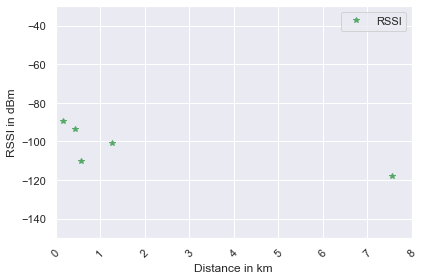

In [17]:
#KERLINK
rssi_gateway7_arrays=[numpyarray_117,numpyarray_127,numpyarray_217,numpyarray_327,numpyarray_227]
mean_rssi_gateway7=[mean_rssi_117,mean_rssi_127,mean_rssi_217,mean_rssi_327,mean_rssi_227]
distance_to_gateway7=[0.159803,0.436207,0.567329,1.27312,7.5617]
plt.plot(distance_to_gateway7,mean_rssi_gateway7, 'g*')
plt.legend(['RSSI']);
plt.xticks(rotation=45);
plt.ylim([-150, -30]);
plt.xlim([0, 8]);
plt.xlabel('Distance in km');
plt.ylabel('RSSI in dBm');
plt.tight_layout()

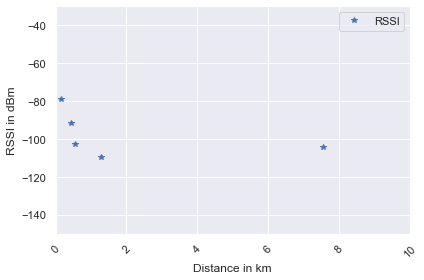

In [18]:
#LORIX
rssi_gateway0_arrays=[numpyarray_110,numpyarray_120,numpyarray_210,numpyarray_320,numpyarray_220]
mean_rssi_gateway0=[mean_rssi_110,mean_rssi_120,mean_rssi_210,mean_rssi_320,mean_rssi_220]
distance_to_gateway0=[0.152015,0.44223,0.55983,1.27161,7.55677]
plt.plot(distance_to_gateway0,mean_rssi_gateway0, 'b*')
plt.legend(['RSSI']);
plt.xticks(rotation=45);
plt.ylim([-150, -30]);
plt.xlim([0, 10]);
plt.xlabel('Distance in km');
plt.ylabel('RSSI in dBm');
plt.tight_layout()

# PATH LOSS MODEL
Path loss model was developed to estimate or predict the possible received signal strength on receiver. It was first used
in determining the coverage of radio signal in a specific region given the optimized antenna location and height. It becomes
useful for distance and location finding when mobile applications and ubiquitous computing are widely deployed.

By RSSI ranging the log-distance path loss model can used to express the relationship between received power and the corresponding distance as shown in the following expression: 

RSSI(d)=RSSI(d0)-10*log(d/d0) 

        where RSSI(d) is the received RSSI/power of the receiver measured at a distance d to the transmitter, which is expressed in dBm and d0 is the1 km reference distance.
 A straight line can be drawn along the received powers RSSI(d) when the distance is using logarithmic scale:
To find path loss exponent n, the gradient of the straight line is used

KERLINK GATEWAY

In [19]:
rssi_n7=[89.24,93.44,110.32,101.01,117.78] #taking postive RSSI values
Log_d7=np.log(distance_to_gateway7) #Taking Log of d/d0; where do=1km
D_7=(Log_d7 * 10) #ultiplying by a factor of 10

In [20]:
#LINEAR REGRESSION FUNCTION  
def estimate_coef(x, y): 
    # number of observations/points 
    n = np.size(x) 
  
    # mean of x and y vector 
    m_x, m_y = np.mean(x), np.mean(y) 
  
    # calculating cross-deviation and deviation about x 
    SS_xy = np.sum(y*x) - n*m_y*m_x 
    SS_xx = np.sum(x*x) - n*m_x*m_x 
  
    # calculating regression coefficients 
    b_1 = SS_xy / SS_xx 
    b_0 = m_y - b_1*m_x 
  
    return(b_0, b_1)

In [21]:
def plot_regression_line(x, y, b): 
    # plotting the actual points as scatter plot 
    plt.scatter(x, y, color = "m", 
               marker = "o", s = 30) 
    # predicted response vector 
    y_pred = b[0] + b[1]*x 
  
    # plotting the regression line 
    plt.plot(x, y_pred, color = "g") 
  
    # putting labels 
    plt.title('PATH LOSS MODEL')
    plt.xlabel('10*log(d/d0)') 
    plt.ylabel('Postive RSSI in dBm') 
  
    # function to show plot 
    plt.show()

Estimated coefficients:
b_0 = 103.69738483497048
b_1 = 0.6934779243348606


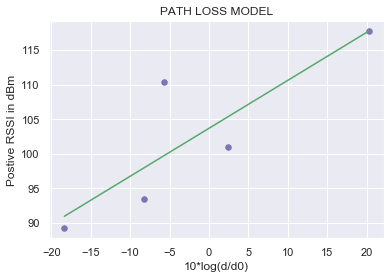

In [22]:
#CALLING MY FUNCTION USING MY DATA
def main(): 
    # observations 
    x = D_7
    y = rssi_n7
  
    # estimating coefficients 
    b = estimate_coef(x, y) 
    print("Estimated coefficients:\nb_0 = {}\nb_1 = {}".format(b[0], b[1])) 
  
    # plotting regression line 
    plot_regression_line(x, y, b) 
  
if __name__ == "__main__": 
    main() 

The PLS is found to be 0.693

LORIX ONE GATEWAY

In [23]:
rssi_n0=[78.753,91.570,102.721,109.741,104.485] #taking postive RSSI values
Log_d0=np.log(distance_to_gateway0) #Taking Log of d/d0; where do=1km
D_0=(Log_d0 * 10) #ultiplying by a factor of 10

Estimated coefficients:
b_0 = 98.75102517857059
b_1 = 0.6376121646167577


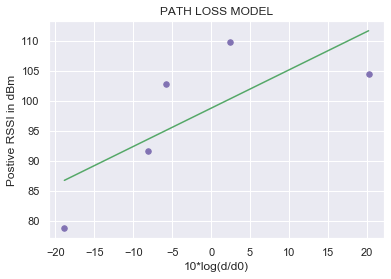

In [24]:
#CALLING MY FUNCTION USING MY DATA
def main(): 
    # observations 
    x = D_0
    y = rssi_n0
  
    # estimating coefficients 
    b = estimate_coef(x, y) 
    print("Estimated coefficients:\nb_0 = {}\nb_1 = {}".format(b[0], b[1])) 
  
    # plotting regression line 
    plot_regression_line(x, y, b) 
  
if __name__ == "__main__": 
    main() 

The PLS is found to be 0.638

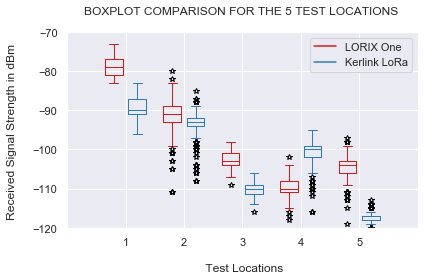

In [26]:
data_a = rssi_gateway0_arrays
data_b = rssi_gateway7_arrays

ticks = ['1', '2', '3','4','5']

def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color)

plt.figure()

bpl = plt.boxplot(data_a, positions=np.array(range(len(data_a)))*2.0-0.4, sym='*', widths=0.6)
bpr = plt.boxplot(data_b, positions=np.array(range(len(data_b)))*2.0+0.4, sym='*', widths=0.6)
set_box_color(bpl, '#D7191C') # colors are from http://colorbrewer2.org/
set_box_color(bpr, '#2C7BB6')

# drawing temporary red and blue lines and use them to create a legend
plt.plot([], c='#D7191C', label='LORIX One')
plt.plot([], c='#2C7BB6', label='Kerlink LoRa')
plt.xlabel('\n Test Locations')
plt.ylabel('Received Signal Strength in dBm \n')
plt.title('BOXPLOT COMPARISON FOR THE 5 TEST LOCATIONS \n')
plt.legend()

plt.xticks(range(0, len(ticks) * 2, 2), ticks)
plt.xlim(-2, len(ticks)*2)
plt.ylim(-120, -70)
plt.tight_layout()
plt.savefig('boxcompare.png')
plt.show()

In [28]:
rssi_n01=[109.741,104.485] #taking postive RSSI values
distance_to_gateway01=[1.27161,7.55677]
Log_d01=np.log(distance_to_gateway01) #Taking Log of d/d0; where do=1km
D_01=(Log_d01 * 10) #ultiplying by a factor of 10

Estimated coefficients:
b_0 = 110.4496522542895
b_1 = -0.29492300879691374


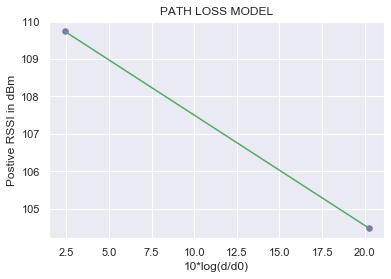

In [29]:
#CALLING MY FUNCTION USING MY DATA
def main(): 
    # observations 
    x = D_01
    y = rssi_n01
  
    # estimating coefficients 
    b = estimate_coef(x, y) 
    print("Estimated coefficients:\nb_0 = {}\nb_1 = {}".format(b[0], b[1])) 
  
    # plotting regression line 
    plot_regression_line(x, y, b) 
  
if __name__ == "__main__": 
    main() 